In [1]:
import kwhmeter as kwm
import kwhmeter_utils as ku
import logging
import pandas as pd
from datetime import datetime,timedelta
logging.basicConfig(level=logging.DEBUG)

In [2]:
domicilio=kwm.suministro('alarcon')

Existen 7 facturas. Desde: 2022-06-15 00:00:00+02:00 hasta:2022-12-24 00:00:00+01:00


In [3]:
periodos_facturacion=domicilio.facturas()
periodos_facturacion

,fechaInicio,fechaFin
factura,,
2022-12-25,2022-11-25 00:00:00+01:00,2022-12-24 00:00:00+01:00
2022-11-25,2022-10-25 00:00:00+02:00,2022-11-24 00:00:00+01:00
2022-10-25,2022-09-25 00:00:00+02:00,2022-10-24 00:00:00+02:00
2022-09-25,2022-08-25 00:00:00+02:00,2022-09-24 00:00:00+02:00
2022-08-25,2022-07-25 00:00:00+02:00,2022-08-24 00:00:00+02:00
2022-07-25,2022-06-25 00:00:00+02:00,2022-07-24 00:00:00+02:00
2022-06-25,2022-06-15 00:00:00+02:00,2022-06-24 00:00:00+02:00


In [4]:
periodos_facturacion.index[0]

'2022-12-25'

In [5]:

start = kwm.timezone.localize(datetime(2022, 12,24)-timedelta(days=0))
end=kwm.timezone.localize(datetime(2023, 1,14)-timedelta(days=0))
print(f'Desde {start} hasta: {end}')
#consumos=domicilio.consumo_facturado(['2022-11-25','2022-12-25'])
consumos=domicilio.consumo(start,end)
consumos

Desde 2022-12-24 00:00:00+01:00 hasta: 2023-01-14 00:00:00+01:00


,consumo,tipo,periodo,factura
fecha,,,,
2022-12-24 01:00:00+01:00,0.0,R,P3,en curso
2022-12-24 02:00:00+01:00,0.0,R,P3,en curso
2022-12-24 03:00:00+01:00,0.0,R,P3,en curso
2022-12-24 04:00:00+01:00,0.0,R,P3,en curso
2022-12-24 05:00:00+01:00,0.0,R,P3,en curso
...,...,...,...,...
2023-01-03 20:00:00+01:00,51.0,R,P1,en curso
2023-01-03 21:00:00+01:00,25.0,R,P1,en curso
2023-01-03 22:00:00+01:00,323.0,R,P1,en curso


In [6]:
consumos.to_csv('consumos.csv')

In [8]:
cc=ku.calculos_pvpc(domicilio.datos,consumos)
cc

INFO:root:recovering missing dates:0


,consumo,tipo,periodo,factura,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
fecha,,,,,,,,,,,,,,,,,,,,,
2022-12-24 01:00:00+01:00,0.0,R,P3,en curso,95.83,6.46,3.03,0.000000,0.000000,0.000000,...,0.010287,0.001173,0.01146,0.000000,0.011460,0.000057,0.00111,0.012627,0.000631,0.013258
2022-12-24 02:00:00+01:00,0.0,R,P3,en curso,72.93,8.03,3.03,0.000000,0.000000,0.000000,...,0.010287,0.001173,0.01146,0.000000,0.011460,0.000057,0.00111,0.012627,0.000631,0.013258
2022-12-24 03:00:00+01:00,0.0,R,P3,en curso,73.83,8.45,3.03,0.000000,0.000000,0.000000,...,0.010287,0.001173,0.01146,0.000000,0.011460,0.000057,0.00111,0.012627,0.000631,0.013258
2022-12-24 04:00:00+01:00,0.0,R,P3,en curso,76.55,10.04,3.03,0.000000,0.000000,0.000000,...,0.010287,0.001173,0.01146,0.000000,0.011460,0.000057,0.00111,0.012627,0.000631,0.013258
2022-12-24 05:00:00+01:00,0.0,R,P3,en curso,76.99,9.86,3.03,0.000000,0.000000,0.000000,...,0.010287,0.001173,0.01146,0.000000,0.011460,0.000057,0.00111,0.012627,0.000631,0.013258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03 20:00:00+01:00,51.0,R,P1,en curso,287.77,9.42,72.99,0.014676,0.000480,0.003722,...,0.010287,0.001173,0.01146,0.014676,0.026136,0.000131,0.00111,0.027376,0.001369,0.028745
2023-01-03 21:00:00+01:00,25.0,R,P1,en curso,276.71,8.88,72.99,0.006918,0.000222,0.001825,...,0.010287,0.001173,0.01146,0.006918,0.018378,0.000092,0.00111,0.019579,0.000979,0.020558
2023-01-03 22:00:00+01:00,323.0,R,P1,en curso,274.49,8.87,72.99,0.088660,0.002865,0.023576,...,0.010287,0.001173,0.01146,0.088660,0.100120,0.000501,0.00111,0.101730,0.005087,0.106817


<AxesSubplot:xlabel='fecha', ylabel='consumo'>

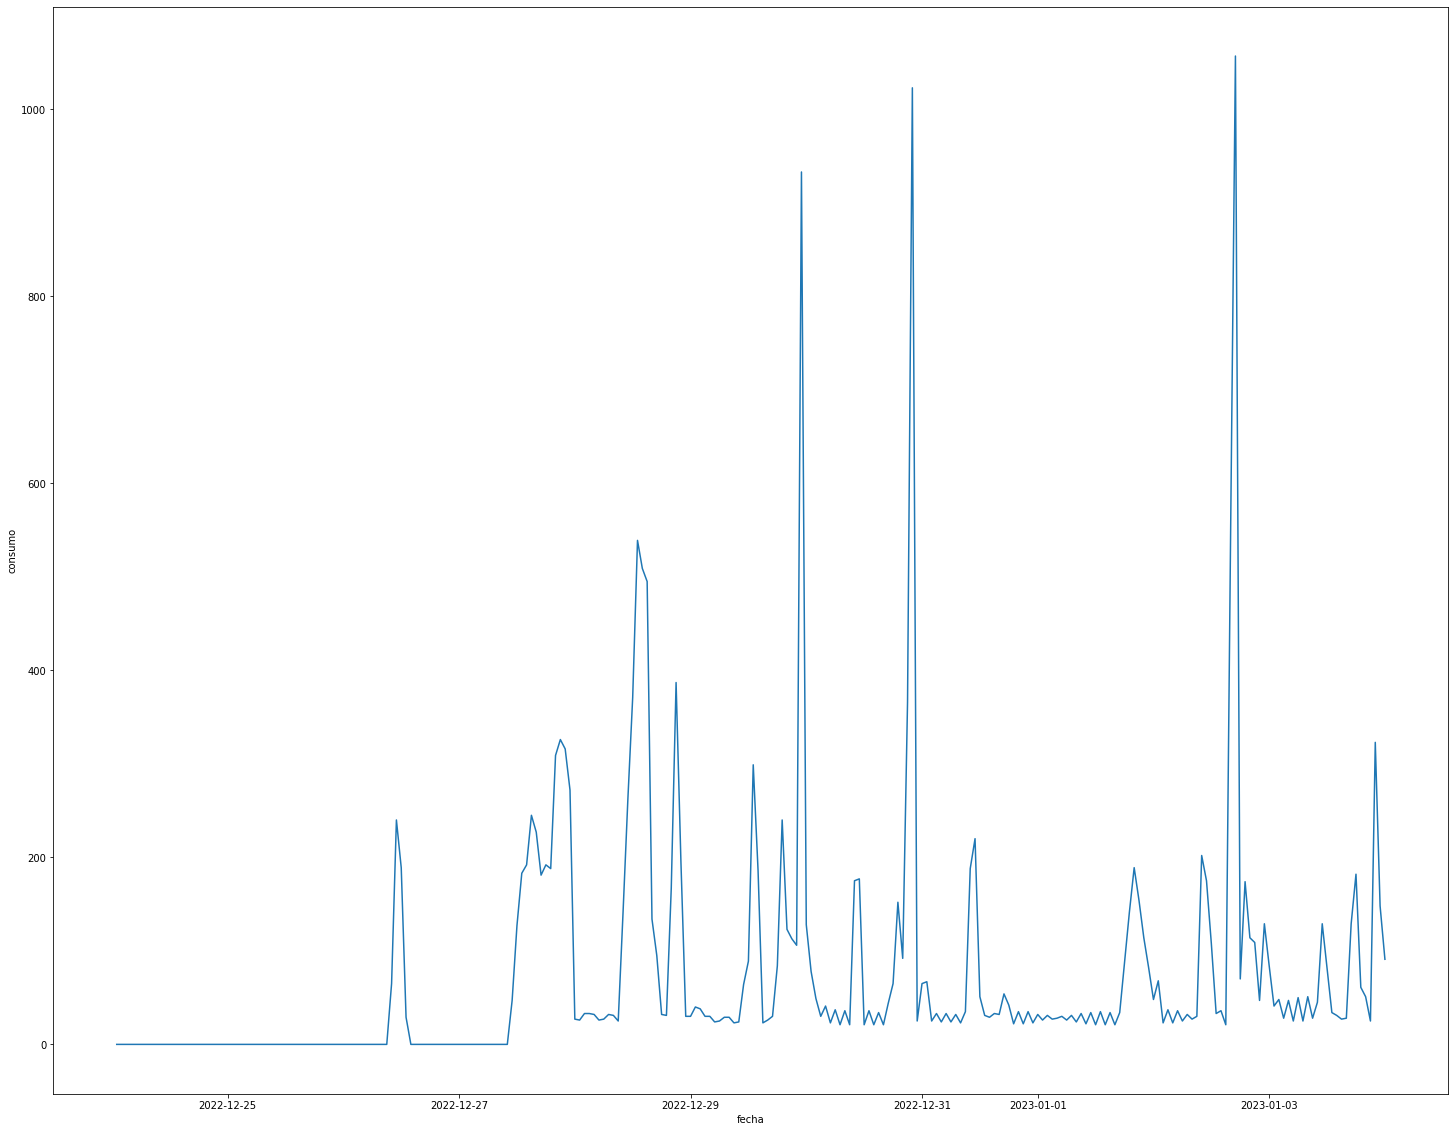

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 20]
sns.lineplot(data=cc.reset_index(),x='fecha',y='consumo')

In [11]:
cc.shape[0]/24

11.0

In [12]:
cc.groupby('periodo').sum()

<ipython-input-12-eedf7e5c06ee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby('periodo').sum()


,consumo,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB,CARGOS_E_PRICE,PEAJES_E_PRICE,PEAJES_E,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
periodo,,,,,,,,,,,,,,,,,,,,,
P1,9248.0,11330.81,313.00,4144.24,1.656317,0.041227,0.685968,2.610832,1.556072,0.256974,...,0.576076,0.065673,0.641749,1.656317,2.298066,0.011490,0.062137,2.371693,0.118585,2.490278
P2,6730.0,8210.27,312.06,1595.92,1.015749,0.031201,0.191885,0.522144,1.072176,0.128853,...,0.576076,0.065673,0.641749,1.015749,1.657498,0.008287,0.062137,1.727922,0.086396,1.814318
P3,3824.0,11601.07,621.64,466.56,0.261918,0.011865,0.011869,0.354312,0.106856,0.002688,...,1.563634,0.178256,1.741890,0.261918,2.003807,0.010019,0.168657,2.182483,0.109124,2.291607


In [15]:
result=ku.formater(domicilio.datos,cc)

In [16]:
result

{'suministro': {'CUPS': 'ES34XXXXXXXXXXXXXXXXX',
  'TITULAR': 'FULANO DE TAL',
  'DIRECCION': 'PASEILLO DE LA PALANQUETA, 3 ROZAS DEL BIERZO MURZIA'},
 'potencias_contratadas': {'P1': 3.3, 'P2': 3.3},
 'periodo': {'desde': datetime.date(2022, 12, 24),
  'hasta': datetime.date(2023, 1, 4)},
 'factura': {'Termino Fijos': {'Subtotal': '20 kWh x 0.15278 €/kWh (ponderado)= 3.03 €',
   'Peajes': {'P1': '11 dias x 0.06298 €/kW dia x 3.3 kWP1 =2.29 €',
    'P2': '11 dias x 0.00257 €/kW dia x 3.3 kWP2 =0.09 €'},
   'Cargos': {'P1': '11 dias x 0.00870 €/kW dia x 3.3 kWP1 =0.32 €',
    'P2': '11 dias x 0.00056 €/kW dia x 3.3 kWP2 =0.02 €'},
   'Margen de comercialización 11 dias x 0.00853 €/kW dia x 3.3 kWP1': 0.3096027},
  'Termino Variables': {'Subtotal': '20 kWh x 0.14817 €/kWh (ponderado)= 2.93 €',
   'Peajes': {'Subtotal': '20 kWh x 0.01962 €/kWh (ponderado)= 0.39 €',
    'P1': '9 kWh x 0.027787 €/kWh = 0.26 €',
    'P2': '7 kWh x 0.019146 €/kWh = 0.13 €',
    'P3': '4 kWh x 0.000703 €/kWh =

In [17]:
import jinja2
template_loader = jinja2.FileSystemLoader('../kwhmeter_utils/templates')
template_env = jinja2.Environment(loader=template_loader)

template = template_env.get_template('factura_pvpc.html')
output_text = template.render(result)

from IPython.core.display import display, HTML
display(HTML(output_text))
with open('pvpc.html',"w") as f:
    f.write(output_text)

In [18]:
import pdfkit
#Define path to wkhtmltopdf.exe
path_to_wkhtmltopdf = r'/usr/bin/wkhtmltopdf'
#Define path to HTML file
path_to_file = 'sample.html'
#Point pdfkit configuration to wkhtmltopdf.exe
config = pdfkit.configuration(wkhtmltopdf=path_to_wkhtmltopdf)
#Convert HTML file to PDF
options = {
    'zoom':3,
}
pdfkit.from_string(output_text, output_path='sample.pdf',options=options)

True

/home/nacho/work/PYTHON/venv/lib/python3.8/site-packages/calplot/calplot.py:193: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax.set_xticks([by_day.loc[pd.Timestamp(


<AxesSubplot:>

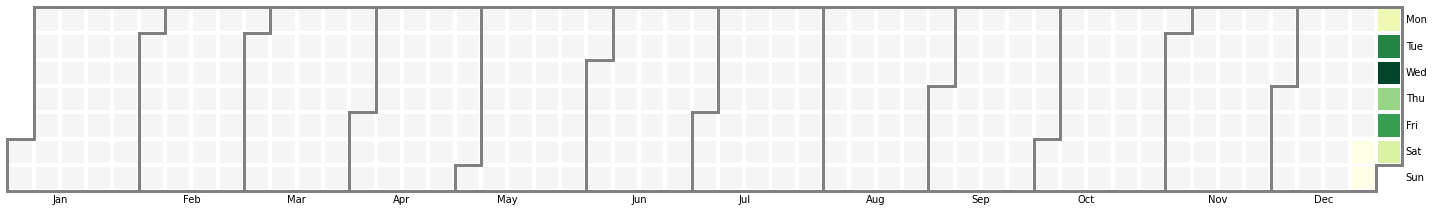

In [19]:
import calplot
cc0=cc[(cc.index.hour>=9) & (cc.index.hour<=22)]
calplot.yearplot(cc0['consumo'],linewidth=3, cmap='YlGn')

In [20]:
cc0

,consumo,tipo,periodo,factura,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
fecha,,,,,,,,,,,,,,,,,,,,,
2022-12-24 09:00:00+01:00,0.0,R,P3,en curso,96.11,4.51,3.03,0.000000,0.000000,0.000000,...,0.010287,0.001173,0.01146,0.000000,0.011460,0.000057,0.00111,0.012627,0.000631,0.013258
2022-12-24 10:00:00+01:00,0.0,R,P3,en curso,89.90,2.34,3.03,0.000000,0.000000,0.000000,...,0.010287,0.001173,0.01146,0.000000,0.011460,0.000057,0.00111,0.012627,0.000631,0.013258
2022-12-24 11:00:00+01:00,0.0,R,P3,en curso,84.27,2.46,3.03,0.000000,0.000000,0.000000,...,0.010287,0.001173,0.01146,0.000000,0.011460,0.000057,0.00111,0.012627,0.000631,0.013258
2022-12-24 12:00:00+01:00,0.0,R,P3,en curso,62.07,1.69,3.03,0.000000,0.000000,0.000000,...,0.010287,0.001173,0.01146,0.000000,0.011460,0.000057,0.00111,0.012627,0.000631,0.013258
2022-12-24 13:00:00+01:00,0.0,R,P3,en curso,59.17,1.81,3.03,0.000000,0.000000,0.000000,...,0.010287,0.001173,0.01146,0.000000,0.011460,0.000057,0.00111,0.012627,0.000631,0.013258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03 18:00:00+01:00,182.0,R,P2,en curso,237.68,9.90,28.57,0.043258,0.001802,0.005200,...,0.010287,0.001173,0.01146,0.043258,0.054718,0.000274,0.00111,0.056101,0.002805,0.058906
2023-01-03 19:00:00+01:00,61.0,R,P1,en curso,298.14,9.68,72.99,0.018187,0.000590,0.004452,...,0.010287,0.001173,0.01146,0.018187,0.029646,0.000148,0.00111,0.030904,0.001545,0.032449
2023-01-03 20:00:00+01:00,51.0,R,P1,en curso,287.77,9.42,72.99,0.014676,0.000480,0.003722,...,0.010287,0.001173,0.01146,0.014676,0.026136,0.000131,0.00111,0.027376,0.001369,0.028745


/home/nacho/work/PYTHON/venv/lib/python3.8/site-packages/calplot/calplot.py:193: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax.set_xticks([by_day.loc[pd.Timestamp(


<AxesSubplot:>

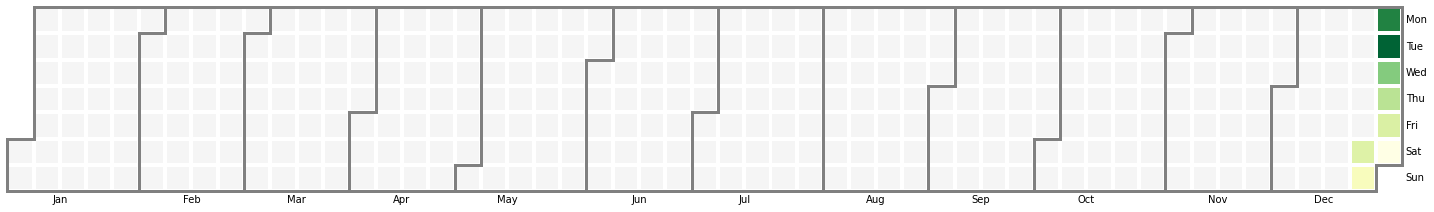

In [21]:
import calplot
calplot.yearplot(cc0['PCB_PRICE'],linewidth=3, cmap='YlGn')